In [1]:
from torch import nn
import torch

##### Attention:
For this lab, there are no local answers for the questions in learntools. However, there are some assertions for the first 4 questions. You should pass all of the assertions before submitting to the autograding.

Some of the questions use mathematical symbols and equations to depict the scenario. These are just some basic "formal" definitions and you should understand them. In case you haven't understood them, read again and give yourself sometime to ponder. If there is any error or details in the questions that heavily confuse you, please post your concerns on Google Classroom. 

## Questions

### Q1: Given a function $f(x) = x^2 + 3x + 8$, return the gradient of $x$ when $x=2.0$ using pytorch autograd. The gradient tensor should have type torch.float32 and dim=0.

In [44]:
def exercise_1() -> torch.Tensor:
    # Define the input tensor x
    # We need requires_grad=True to compute gradients with respect to x
    # Set dtype to torch.float32 as required
    # a tensor is like a multi-dimensional array commonly used for deep-learning
    x = torch.tensor(2.0, dtype = torch.float32, requires_grad=True)
    #the requires_grad tracks the computations related to x in the computational graph

    # Define the function f(x) = x^2 + 3x + 8
    f_x = x**2 + 3*x + 8
    # x is a scalar, f_x is a scalar tensor, 

    # Compute the gradient using autograd
    # backward() computes the gradient of the scalar tensor f_x with respect to x
    f_x.backward()

    # The gradient is stored in the .grad attribute of the tensor x
    # print(x)
    gradient_x = x.grad

    # Print the gradient tensor
    return gradient_x
    raise NotImplementedError

ex1_sol = exercise_1()
assert torch.equal(ex1_sol, torch.tensor(7.0))

### Q2: A typical layer in a Neural Network would look like $f(x) = w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + b$, where $w_j$ is the j-th weight of the function and $b$ is its bias. This function outputs a result for a multi-dimension input, where $x_j$ is the j-th feature of the input. Implement this function, return the gradients of each weight for a given input `x` and the output using `tuple` with the formar `(output, weight_grads_tensor)`. The weights should be randomized using `torch.randn()` and the bias must be set to $5.0$. The input used by the autograder will be the same size as the one given below.

In [45]:
x = torch.tensor([1, 2, 3, 4, 5], dtype = torch.float32)
# this is usally dataset of many samples, the dimension is usually (batch_size, num_features)

def exercise_2(x) -> tuple:
    # all the output and gradients are tensors
    torch.manual_seed(0) # must set seed=0 before random your weight
    num_featues = x.shape[0]
    # in this case x is only 1 datapoint and has all the features
    # print(num_featues)
    weights = torch.randn(num_featues, dtype = x.dtype, requires_grad=True )
    bias = torch.tensor([5.0], dtype = x.dtype, requires_grad=True)
    output = x @ weights + bias 
    # @ is a matrix multiplication operator in pytorch
    # basically it sees x of size (5,) and weights of size (5,) and
    # @ treats x as (1,5) and weights as (5,1)
    output.backward()
    # this only calculate the gradients, not change any thing of the weights
    weight_grads_tensor = weights.grad
    return (output, weight_grads_tensor)

    
    raise NotImplementedError
    # you must return in this format
    # return (output, weight_grads_tensor)

ex2_sol = exercise_2(x)

assert (ex2_sol[0] - torch.tensor(-3.7311) < 1e-4).item()
assert torch.equal(ex2_sol[1], torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32))

### Q3: Suppose each feature $x_j$ needs a separate function $f_j(x_j)$, where $f_j(x_j) = w_j x_j + b_j$. In other words, each feature requires a function, which has a separate set of 1 weight and 1 bias. Therefore, the output $y$ of your function $G(x)=[f_1(x_1), f_2(x_2), ..., f_n(x_n)]$ should be $y = [(w_1 x_1 + b_1), (w_2 x_2 + b_2), ..., (w_n x_n + b_n)]$ (**note:** these are matrices written lazily with markdown). Implement the function $G(x)$, return the output and the gradient sets for each function for a given `x`. The weights should be randomized using `torch.randn()`, and the bias is the same as $j$ of $f_j()$ (for example: $b_1 = 1.0$, $b_2 = 2.0$). The input used by the autograder will be the same size as the one given below.

In [34]:
x = torch.tensor([1, 2, 3, 4, 5], dtype = torch.float32)

def exercise_3(x) -> tuple:
     # all the output and gradients are tensors
    
    torch.manual_seed(0) # must set seed=0 before random your weight
    num_features = x.shape[0]
    weights = torch.randn(num_features, dtype=torch.float32, requires_grad=True)
    bias = torch.tensor([x+1 for x in range(num_features)], dtype = torch.float32, requires_grad=True)
    output = x * weights + bias
    # We need a scalar to call .backward() on.
    scalar_output_for_backward = output.sum()
    scalar_output_for_backward.backward()

    weights_grads_tensor = weights.grad
    return (output, weights_grads_tensor)

    raise NotImplementedError
    # you must return in this format
    # return (output, weight_grads_tensor)

ex3_sol = exercise_3(x)
assert torch.all((ex3_sol[0] - torch.tensor([ 2.5410,  1.4131, -3.5364,  6.2737, -0.4226 ], dtype=torch.float32)) < 5e-4).item()
assert torch.equal(ex3_sol[1], torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32))
# q3.check()

### Q4: Using the function $f(x)$ similar to the one in question 2, implement the function with random weights and bias (must use `torch.manual_seed(0)` before each initialization). Calculate the Mean Squared Error between the `target` and your function prediction on the `data` as a loss metric, then return a tuple containing the gradients of your function weights and bias based on the calculated loss.

In [ ]:
data = torch.tensor([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0], dtype = torch.float32)
target = torch.tensor([2.0], dtype = torch.float32)
import torch.nn.functional as F

def exercise_4(data, target) -> tuple:
    # both gradients are tensors
    torch.manual_seed(0)
    num_features = data.shape[0]
    weights = torch.randn(num_features, dtype=torch.float32, requires_grad=True)
    torch.manual_seed(0)
    bias = torch.randn(1, dtype = torch.float32, requires_grad=True)
    #they want me to use the randn here

    prediction  = data @ weights + bias
    # print(prediction)
    loss = F.mse_loss(prediction, target) #the dimension of prediction and target is (1,)
    loss.backward()
    weights_grads_tensor = weights.grad
    bias_grads_tensor = bias.grad
    return (weights_grads_tensor, bias_grads_tensor)



    raise NotImplementedError
    # you must return in this format
    # return (weight_grads_tensor, bias_grads_tensor)



ex4_sol = exercise_4(data, target)
assert ex4_sol[0].dim() == 1 and ex4_sol[1].dim() == 1, print("All tensors must have dim == 1")
assert torch.all((ex4_sol[0] - torch.tensor([-85.1518, -127.7277, -170.3036, -212.8795, -255.4553, -298.0312, -340.6071, -383.1830, -425.7589, -468.3348], dtype=torch.float32)) < 5e-4)
assert torch.all((ex4_sol[1] - torch.tensor([-42.5759], dtype=torch.float32)) < 5e-4)

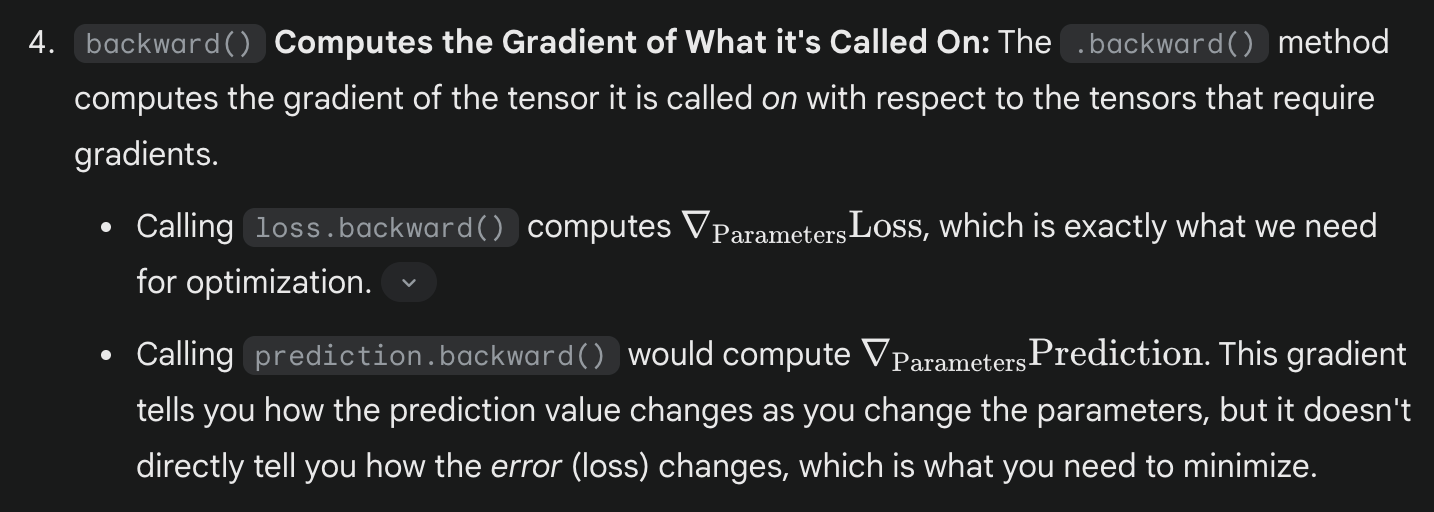

### Q5: This question worth 40% the points of this lab. Your solution for this question will be graded manually by the TAs, hence you will be informed later for the total points for this lab after the deadline has been met.

**Note**: This question will not focus on getting the right results as your implementation is more important. Therefore there will be no local answer or autograding.

#### Create a small neural network consisting 2 Linear layers, each followed by a Sigmoid activation function. The template code has been provided below including the return format (`x` should be replaced by the final `tensor` after the forward pass). Your code must use layers and functions provided by `pytorch`. Initialize all necessary components that can be used during the training phase including a Binary Cross Entropy Loss function and a Gradient Descent optimizer. Train your model for 2 epochs with a proper train loop, then make a prediction on a given `val_x` and return your prediction.

**Note**: the first Linear Layer can have any `in_features` and `out_features`, but the last Linear Layer must have `out_features=2`. Your model will consume the whole input for each epoch, so you don't need to separate the input into batches.

*Context*: This part is not necessary for your implementation, but it could help you to understand the work that your network is simulating. The `train_x` consists grades for 5 subjects of 20 students, with the minimum grade is 1 and the maximum is 10. The problem is a classification task, when your model predicts if a student is good or bad based on their 5 grades. That is the reason why the final layer must have 2 output features, which correspond to the 2 classes "good" and "bad".

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# These are the data definitions from your template
train_x = torch.randint(1, 10, (20, 5), dtype=torch.float32) # input
train_y = (train_x.sum(1) > 30).float() # target, shape (20,)
val_x = torch.randint(3, 10, (10, 5), dtype=torch.float32)

def exercise_5(train_x: torch.Tensor, train_y: torch.Tensor, val_x: torch.Tensor) -> torch.Tensor:

    class MyNetwork(nn.Module):
        def __init__(self):
            super(MyNetwork, self).__init__()
            # Requirements: 2 Linear layers, each followed by Sigmoid.
            # Input features for the first layer is 5 (from train_x.shape[1]).
            # Let's choose hidden_features = 10 (arbitrary, as allowed).
            # The final Linear Layer must have out_features=2.
            input_dim = train_x.shape[1] # Should be 5
            hidden_dim = 10
            output_dim_internal = 2 # Second linear layer outputs 2 features

            # Layer 1
            self.linear_layer_1 = nn.Linear(input_dim, hidden_dim)
            self.sigmoid_1 = nn.Sigmoid()

            # Layer 2
            self.linear_layer_2 = nn.Linear(hidden_dim, output_dim_internal)
            self.sigmoid_2 = nn.Sigmoid()

        def forward(self, x: torch.Tensor) -> torch.Tensor:
            # layer 1
            x = self.linear_layer_1(x)
            x = self.sigmoid_1(x)

            # layer 2
            x = self.linear_layer_2(x)
            x = self.sigmoid_2(x)  # After this, x has shape (batch_size, 2)

            # As per template's "return x[:,0]", we select the first component of the 2-feature output.
            # This makes the network's effective output a tensor of shape (batch_size,).
            return x

    # Loss Function: Binary Cross Entropy Loss (as per image description)
    # This is suitable because the model's output (after x[:,0]) will be a probability (0-1),
    # and train_y is also 0.0 or 1.0.
    train_y = F.one_hot(train_y.long(), num_classes=2).float()
    #use one_hot encoding to make sure the train_y is of size (20,2) to fit the loss_criterion
    print(train_y)
    loss_criterion = nn.BCELoss() # Renamed from 'loss' to avoid conflict in the loop

    # Model Instantiation
    model = MyNetwork()

    # Optimizer: Gradient Descent (SGD - Stochastic Gradient Descent, as per image description)
    learning_rate = 0.01 # A common learning rate
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Training loop (2 epochs, as per image description and template)
    model.train() # Set the model to training mode
    for i in range(2):
        # Forward pass: get predictions on training data
        output = model(train_x) #this will return x of size (20,2)

        # Calculate loss
        current_epoch_loss = loss_criterion(output, train_y)

        # Backward pass and optimization
        optimizer.zero_grad()             # Clear gradients from previous iteration
        current_epoch_loss.backward()     # Compute gradients
        optimizer.step()                  # Update model weights

        # You can uncomment this to see the loss per epoch if needed
        # print(f"Epoch {i+1}/2, Loss: {current_epoch_loss.item():.4f}")

    # Prediction on val_x
    model.eval() # Set the model to evaluation mode (important for some layers like Dropout, BatchNorm)
    with torch.no_grad(): # Disable gradient calculation for inference
        prediction_on_val_x = model(val_x) # `prediction_on_val_x` will have shape (10,)
    #I only need to do this once, if I want to monitor this while training I can do it in the loop

    # The function should return the prediction on val_x
    return prediction_on_val_x


ex5_sol = exercise_5(train_x=train_x, train_y=train_y, val_x=val_x)

#used AI to print some debuging and testing codes
# --- Test Run ---
print("--- Data Overview ---")
print("Sample Training Input (train_x first 5 rows):")
print(train_x[:5])
print("\nSample Training Targets (train_y first 5 values):")
print(train_y[:5])
print(f"(Note: train_y is 1.0 if sum of features > 30, else 0.0)")

print("\nSample Validation Input (val_x first 5 rows):")
print(val_x[:5])
print("-" * 30)

# Call the function
ex5_sol = exercise_5(train_x=train_x, train_y=train_y, val_x=val_x)

print("-" * 30)
print("\n--- Predictions on Validation Data ---")
print("Validation Input (val_x all rows):")
print(val_x)
print("\nPredictions for val_x (ex5_sol):")
print(ex5_sol)
print("\nShape of predictions:", ex5_sol.shape)
print("\nInterpretation of predictions:")
print("These are raw probability scores (between 0 and 1) from the model's first output neuron.")
print("A value closer to 1 suggests the model predicts the condition (sum of features > 30) is true for that input.")
print("A value closer to 0 suggests the model predicts the condition is false.")
print("-" * 30)

# For a more direct comparison, let's calculate the "true" condition for val_x
# This is NOT part of the exercise_5 function, just for our test run observation
true_val_condition = (val_x.sum(1) > 30).float()
print("\nFor reference: True condition for val_x (sum > 30):")
print(true_val_condition)
print("(This is what the model is trying to predict for val_x based on its training)")




tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])
--- Data Overview ---
Sample Training Input (train_x first 5 rows):
tensor([[9., 5., 2., 2., 6.],
        [2., 6., 6., 4., 7.],
        [3., 6., 3., 5., 9.],
        [1., 1., 7., 1., 5.],
        [1., 2., 7., 9., 9.]])

Sample Training Targets (train_y first 5 values):
tensor([0., 0., 0., 0., 0.])
(Note: train_y is 1.0 if sum of features > 30, else 0.0)

Sample Validation Input (val_x first 5 rows):
tensor([[5., 3., 7., 8., 4.],
        [8., 6., 6., 3., 9.],
        [6., 4., 8., 5., 5.],
        [8., 5., 3., 6., 5.],
        [6., 3., 9., 6., 5.]])
------------------------------
tensor([[1., 0.],
        [1., 0.],
        [1., 0.],


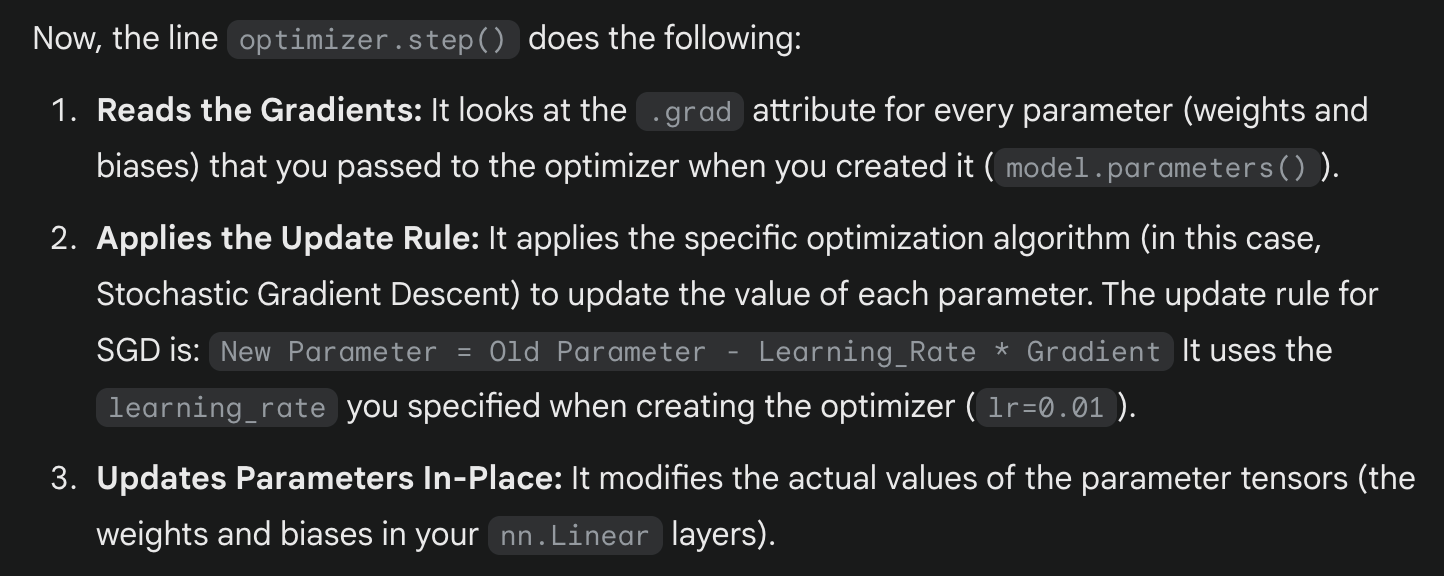